# Network Selection

This notebook provides a more in-depth look at selecting the optimal network for MintPy SBAS analysis

In [2]:
# %matplotlib widget
%matplotlib inline
import glob
import sys
import shutil
import os
import matplotlib.pyplot as plt
from mintpy.utils import readfile
from mintpy import workflow, view, tsview, plot_network, plot_transection, plot_coherence_matrix
from mintpy.unwrap_error_phase_closure import plot_num_triplet_with_nonzero_integer_ambiguity

In [3]:
cd /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy

/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy


view.py ./inputs/ifgramStack.h5 unwrapPhase -m waterMask.h5 --vlim -50 50 --noverbose


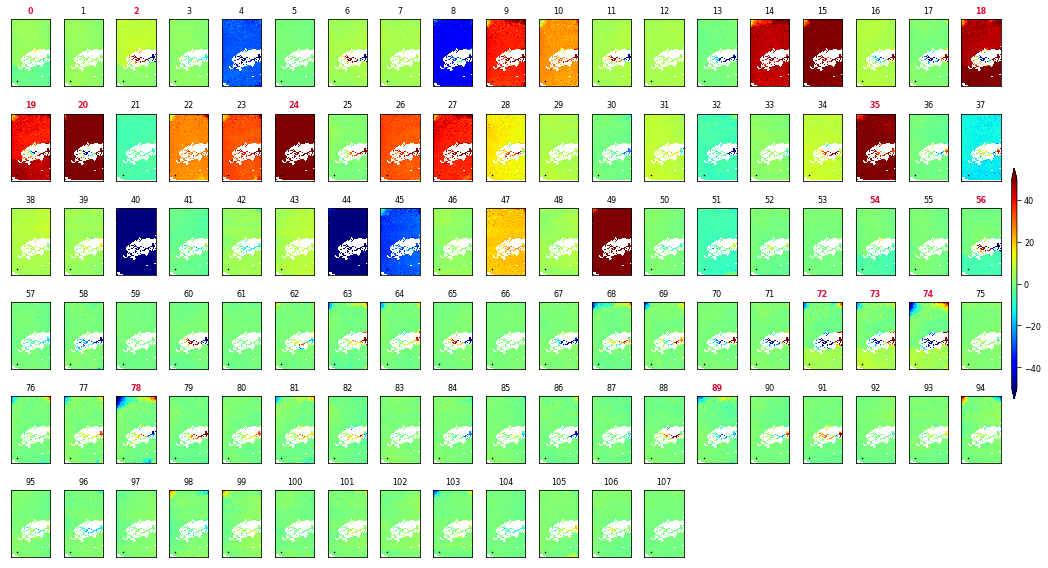

In [4]:
view.main('./inputs/ifgramStack.h5 unwrapPhase -m waterMask.h5 --vlim -50 50 --noverbose'.split())

In [53]:
!spatial_average.py inputs/ifgramStack.h5 -d unwrapPhase -m waterMask.h5


*************** Spatial Average ******************
calculating spatial mean of unwrapPhase in file inputs/ifgramStack.h5 ...
read mask from file: waterMask.h5
[==================================================] 54/54   26s /     0s 
write average value in space into text file: unwrapPhaseSpatialAvg.txt


In [54]:
cat unwrapPhaseSpatialAvg.txt

# Data file: ifgramStack.h5
# Mask file: waterMask.h5
# AOI box: (0, 0, 4892, 8333)
# Threshold: None
#	DATE12		Mean	Btemp/days	Bperp/m		Num
20090220_20091119	1.1682	     272	     0.0	0
20090220_20100115	3.0608	     329	     0.0	1
20090220_20100301	5.7126	     374	     0.0	2
20090220_20100423	1.8985	     427	     0.0	3
20090220_20101110	-29.7953	     628	     0.0	4
20091119_20100115	-0.3169	      57	     0.0	5
20091119_20100301	4.5585	     102	     0.0	6
20091119_20100423	5.1493	     155	     0.0	7
20091119_20101110	-38.2805	     356	     0.0	8
20091119_20110712	39.3358	     600	     0.0	9
20091119_20111103	25.1419	     714	     0.0	10
20100115_20100301	4.1153	      45	     0.0	11
20100115_20100423	5.4913	      98	     0.0	12
20100115_20101110	-1.1714	     299	     0.0	13
20100115_20110712	44.5643	     543	     0.0	14
20100115_20111103	50.6054	     657	     0.0	15
20100301_20100423	7.2421	      53	     0.0	16
20100301_20101110	1.6803	     254	     0.0	17
20100301_20110712	49.3908	     

20100423_20120413 has the highest average phase (105.9172), so let's look at the raw data

In [55]:
data1, atr = readfile.read('../Igrams/20100423_20120413/filt_20100423_20120413_snaphu.unw')
data2, atr = readfile.read('../Igrams/20140528_20160324/filt_20140528_20160324_snaphu.unw')
print(data1.mean(),data2.mean())

104.676 -77.73883


These don't match MintPy's reported values exactly because we haven't masked the raw data, but it's close enough to conclude that the raw data is actually the issue. From Eric:

> SNAPHU sets the top left corner (I think) to zero in the phase unwrapping. If that is in an area of bad coherence, it pushes the mean phase to some large value.

Based on this, these high average values are probably an artifact from SNAPHU and should be corrected in the inversion step

There are quite a few interferograms with large phase differences, but for now let's just remove interferograms with phase discontinuities [0,2,18].

read options from template file: Haywrd_05502_01-S1.cfg
read temporal/spatial baseline info from file: ./inputs/ifgramStack.h5
calculating spatial mean of coherence in file ./inputs/ifgramStack.h5 ...
read mask from file: waterMask.h5
[==================================================] 54/54   28s /     0s 
write average value in space into text file: coherenceSpatialAvg.txt
number of acquisitions: 19
number of interferograms: 54
shift all perp baseline by 0.0 to zero mean for plotting
--------------------------------------------------
number of interferograms marked as drop: 7
number of interferograms marked as keep: 47
number of acquisitions marked as drop: 0
max perpendicular baseline: 0.00 m
max temporal      baseline: 798.0 days
showing coherence
data range: [0.3789694, 0.822302]
display range: (0.2, 1.0)
showing ...


/home/fwilliam/tools/MintPy/mintpy/utils/plot.py:464: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([ymin, ymax])
/home/fwilliam/tools/MintPy/mintpy/utils/plot.py:464: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([ymin, ymax])


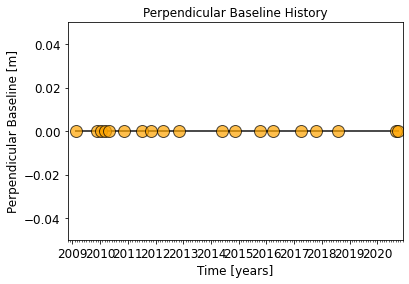

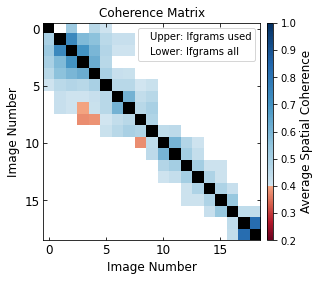

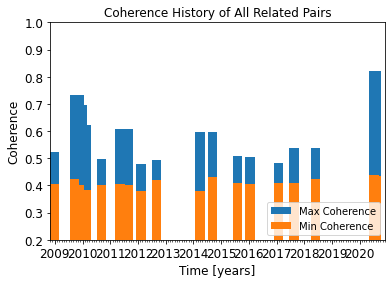

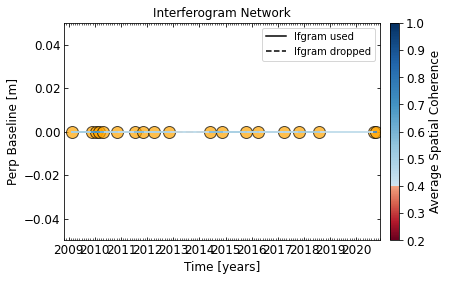

In [5]:
plot_network.main('./inputs/ifgramStack.h5 -t ../JPL_internship/Haywrd_05502_01-S1.cfg'.split())

Dropped 7 of 54 interferograms, but still have fully connected network with avgSpatialCoh > 0.4 threshold